# OBESITY PREDICTION

### DATASET DESCRIPTION

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition.

The attributes related with eating habits are: 

- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC), Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)

The attributes related with the physical condition are: 

- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)


Variables obtained :

- Gender, Age, Height and Weight.

NObesity values from the dataset can have these values:

- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40


In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv("ObesityDataSet.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.isnull().sum()  #There are no null values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Gender,2
Age,1402
Height,1574
Weight,1525
family_history_with_overweight,2
FAVC,2
FCVC,810
NCP,635
CAEC,4
SMOKE,2


In [6]:
numeric_var = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF","TUE"]
categoric_var = ["Gender","family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

In [7]:
df[numeric_var].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


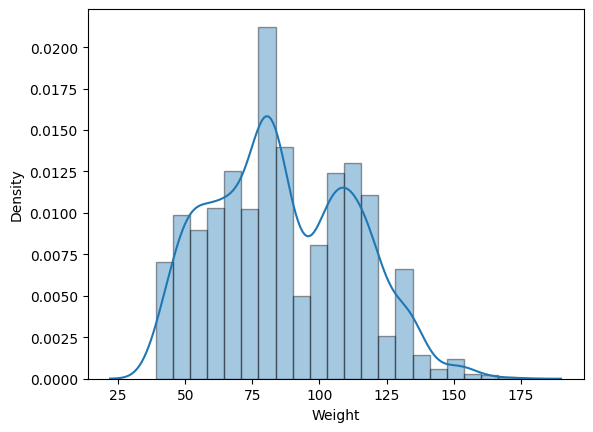

In [8]:
sns.distplot(df["Weight"], hist_kws = dict(linewidth = 1, edgecolor = "k"));

### EXPLORATORY DATA ANALYSIS

#### Numerical variables

In [9]:
numeric_var

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [10]:
numeric_axis_name = ["Age of the subject", "Height of the subject", "Weight of the subject", "Frequency of consumption of vegetables", "Number of main meals", "Consumption of water daily", "Physical activity frequency", "Time using technology devices" ]

In [11]:
list(zip(numeric_var, numeric_axis_name))

[('Age', 'Age of the subject'),
 ('Height', 'Height of the subject'),
 ('Weight', 'Weight of the subject'),
 ('FCVC', 'Frequency of consumption of vegetables'),
 ('NCP', 'Number of main meals'),
 ('CH2O', 'Consumption of water daily'),
 ('FAF', 'Physical activity frequency'),
 ('TUE', 'Time using technology devices')]

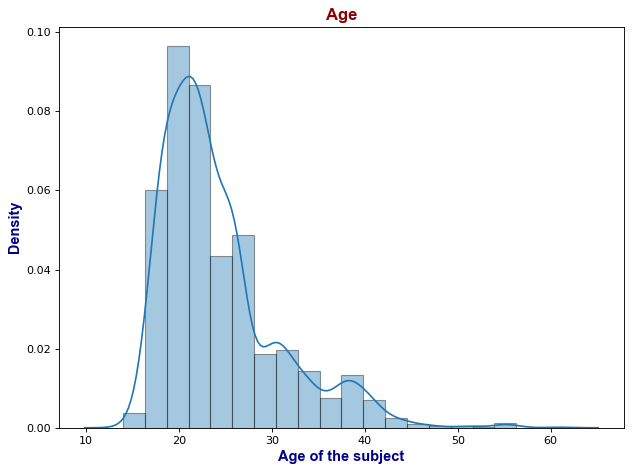

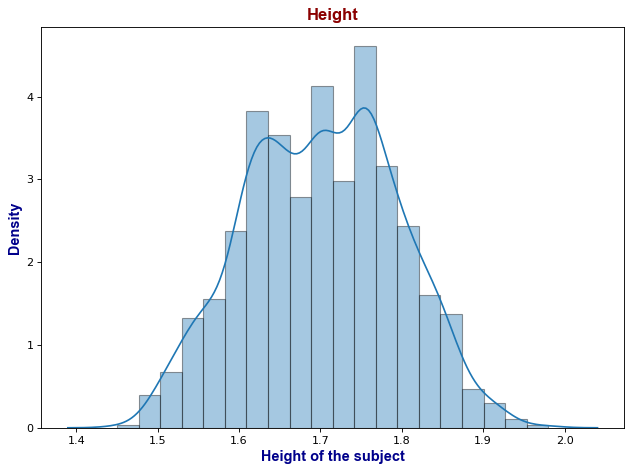

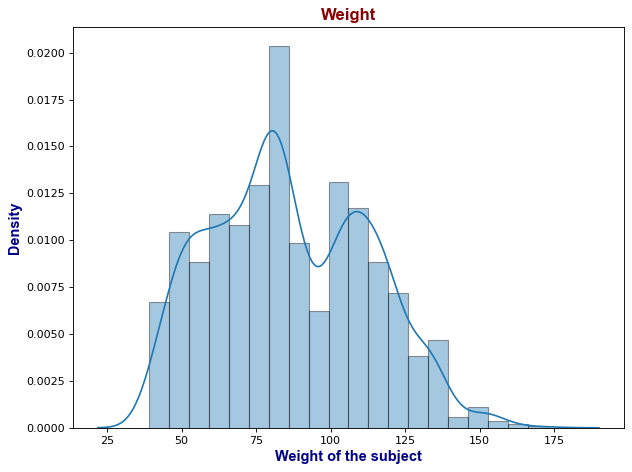

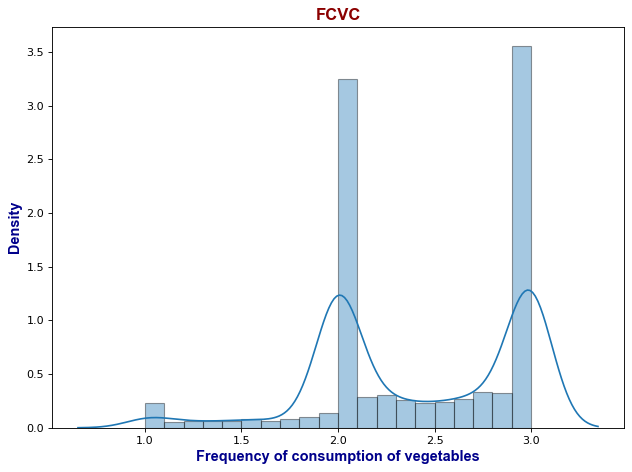

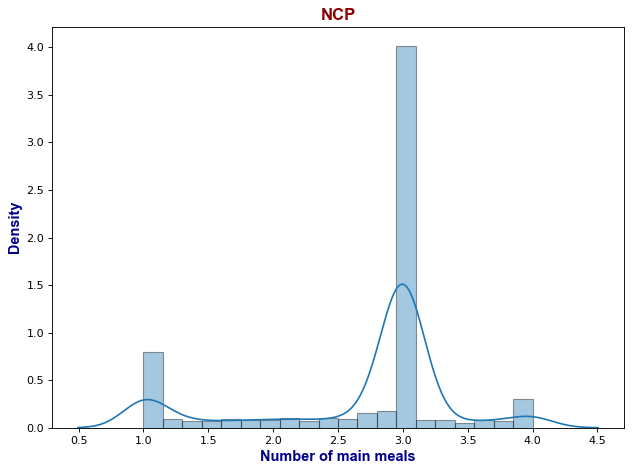

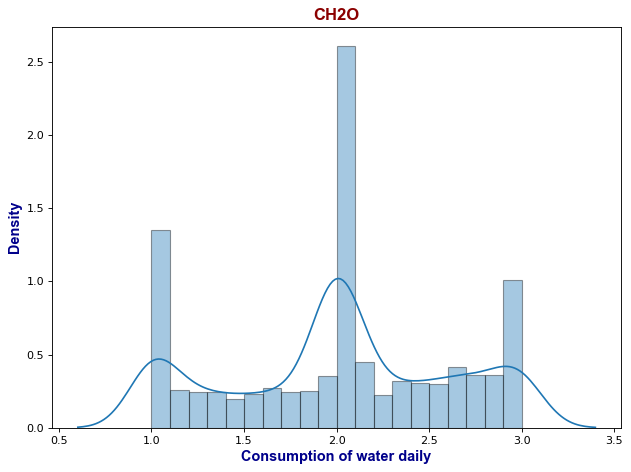

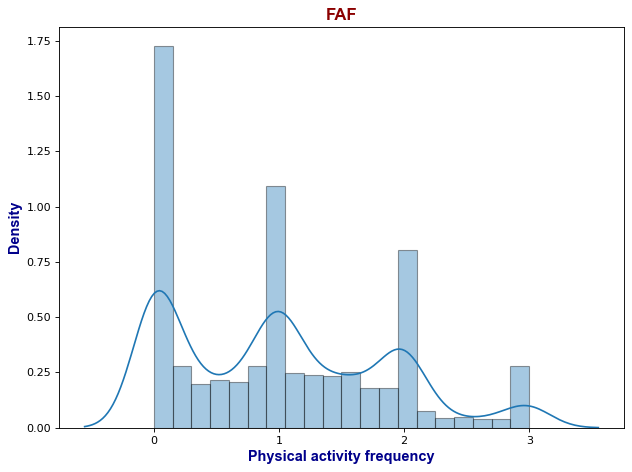

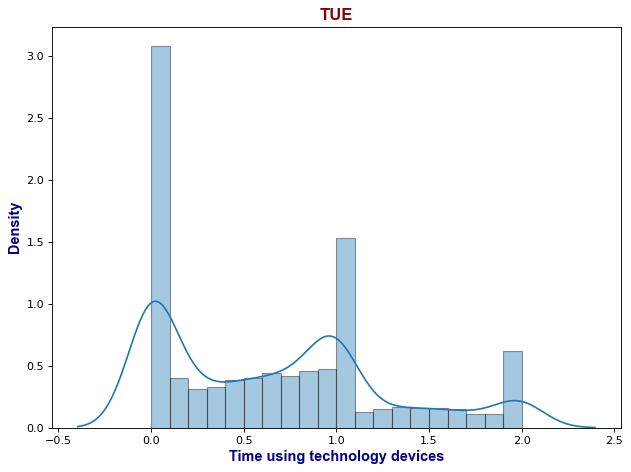

In [12]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

##### Outliers removing

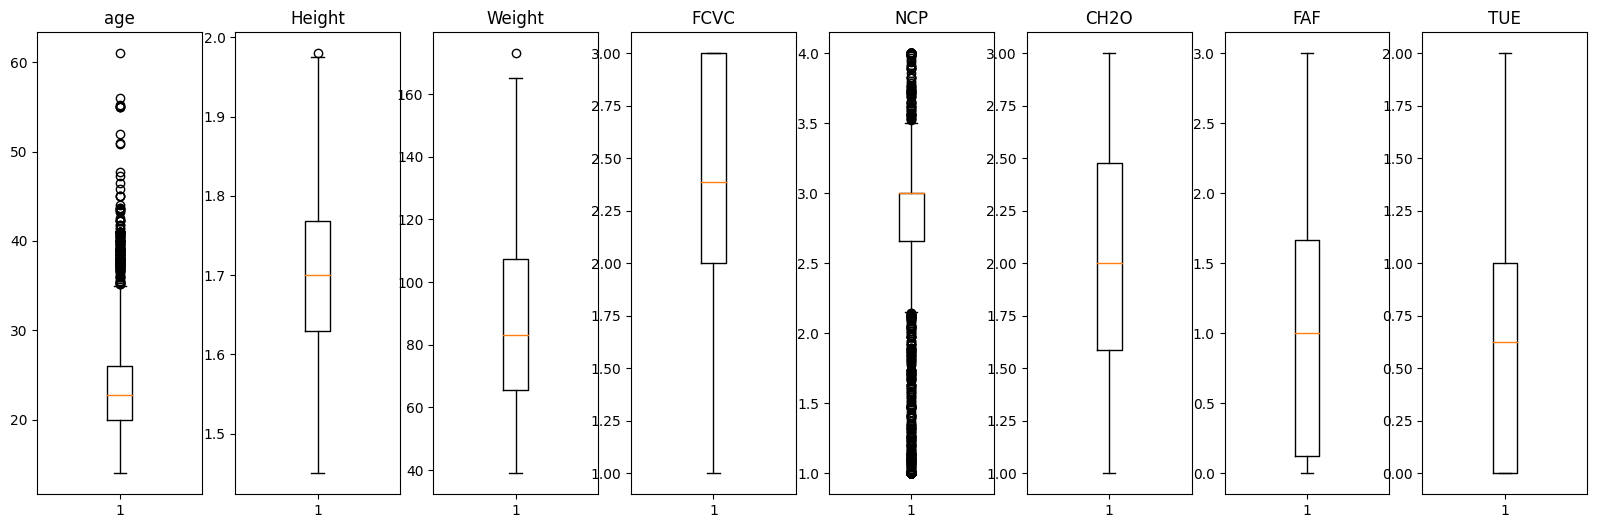

In [13]:
# We visualize the outliers from the numerical variables using the boxplot:

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1, 8, figsize = (20, 6))

ax1.boxplot(df["Age"])
ax1.set_title("age")

ax2.boxplot(df["Height"])
ax2.set_title("Height")

ax3.boxplot(df["Weight"])
ax3.set_title("Weight")

ax4.boxplot(df["FCVC"])
ax4.set_title("FCVC")


ax5.boxplot(df["NCP"])
ax5.set_title("NCP")

ax6.boxplot(df["CH2O"])
ax6.set_title("CH2O")

ax7.boxplot(df["FAF"])
ax7.set_title("FAF")


ax8.boxplot(df["TUE"])
ax8.set_title("TUE")
plt.show()



Text(0.5, 1.0, 'NCP')

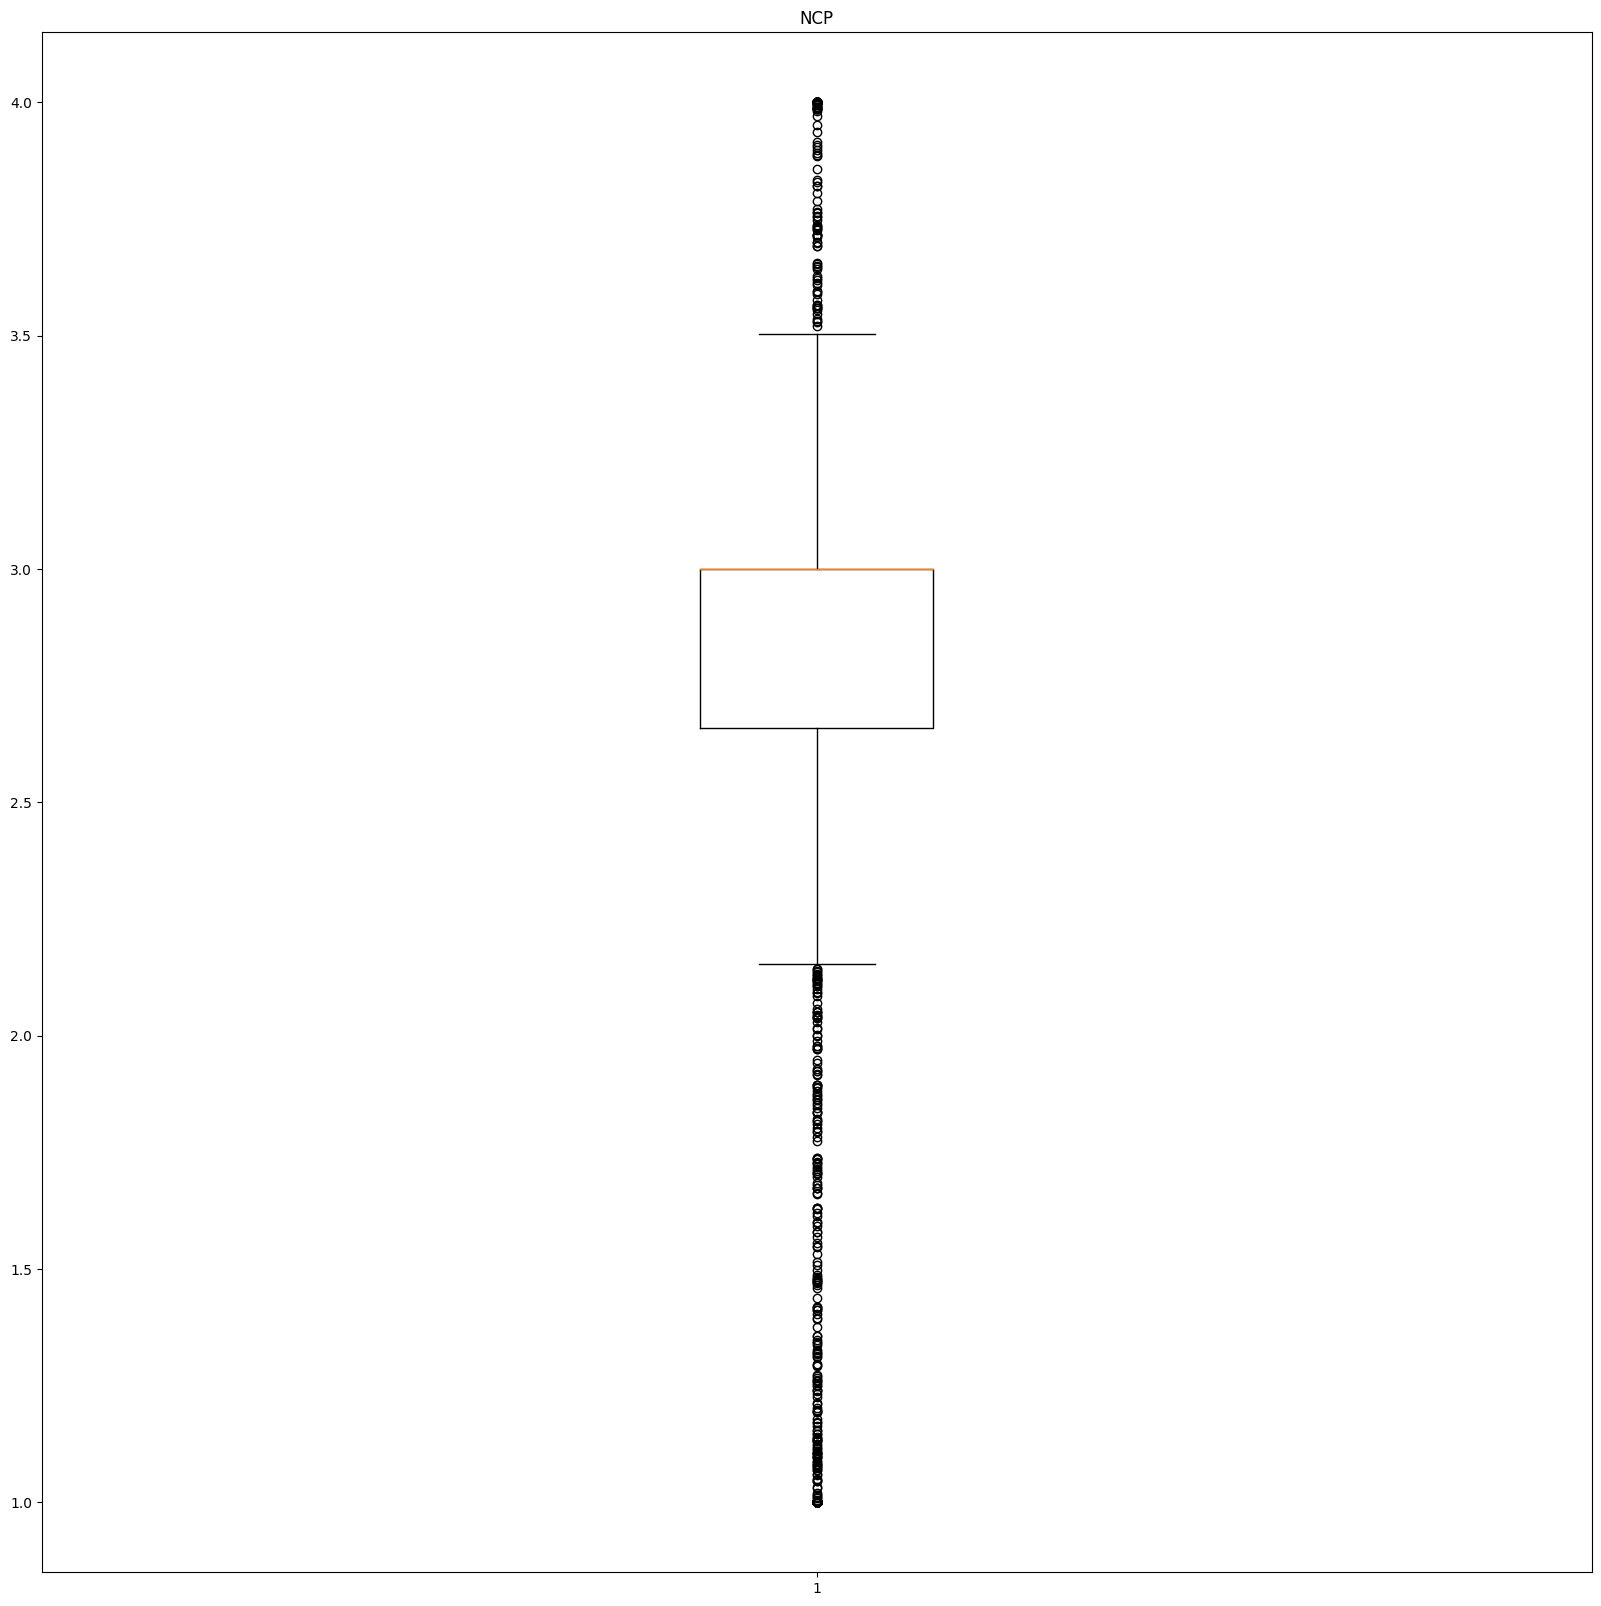

In [14]:
fig, (ax5) = plt.subplots(1, 1, figsize = (20, 20))

ax5.boxplot(df["NCP"])
ax5.set_title("NCP")

In [15]:
df["NCP"].count

<bound method Series.count of 0       3.0
1       3.0
2       3.0
3       3.0
4       1.0
       ... 
2106    3.0
2107    3.0
2108    3.0
2109    3.0
2110    3.0
Name: NCP, Length: 2111, dtype: float64>

#### Categorical variables

In [16]:
categoric_axis_name = ["Gender", "Family history with overweight", "Frequent consumption of high caloric food", "Consumption of food between meals",
                      "Smoking", "Calories consumption monitoring", "Consumption of alcohol", "Transportation used", "Target"]

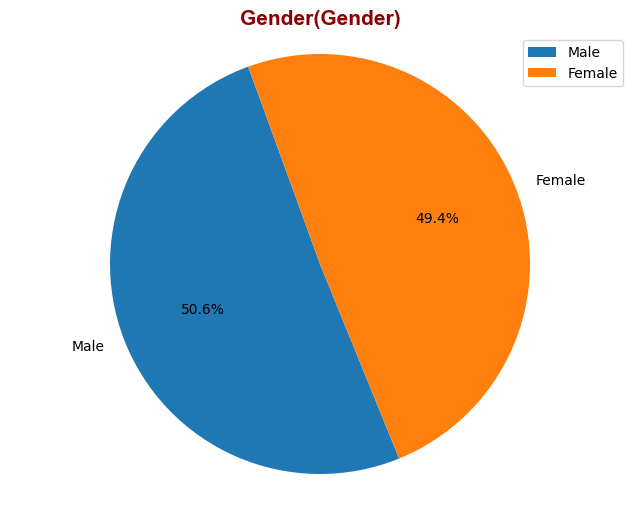

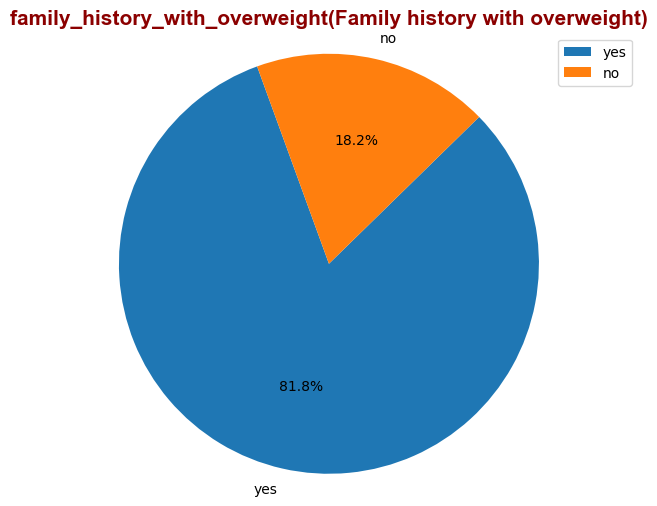

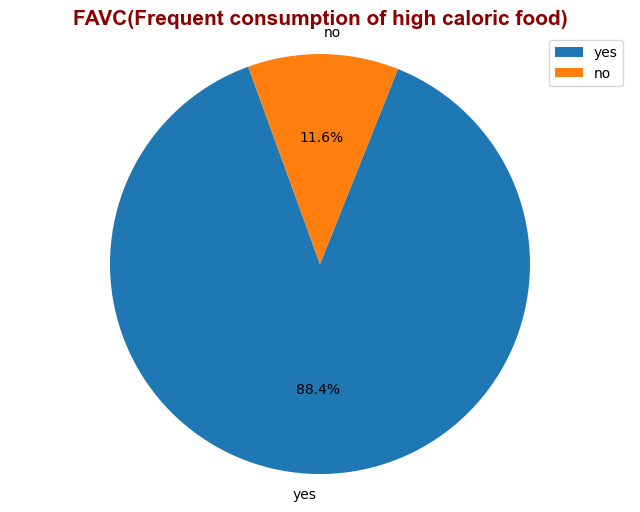

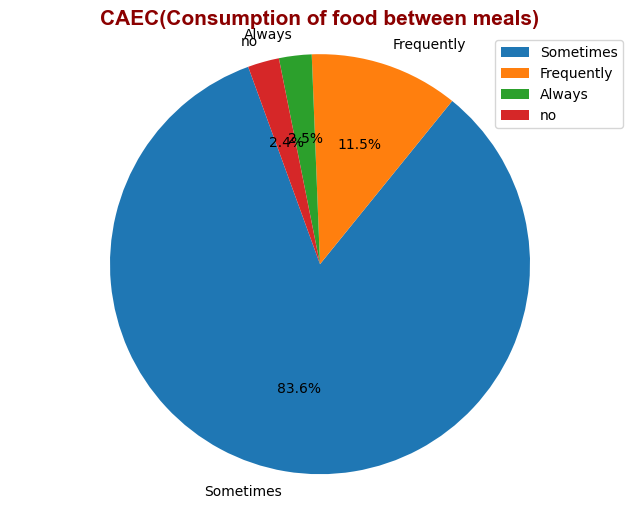

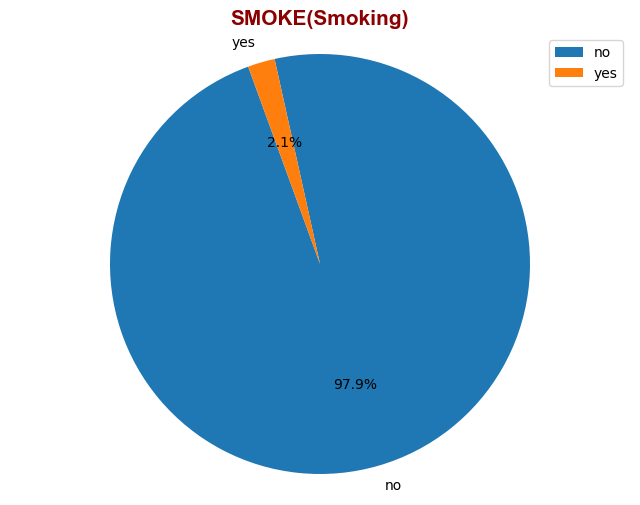

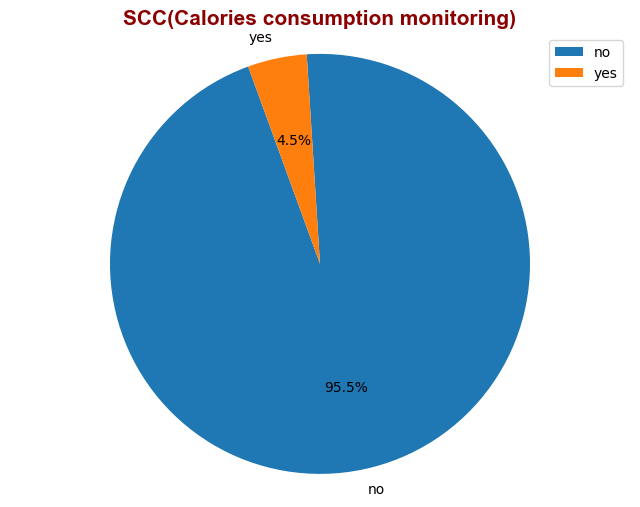

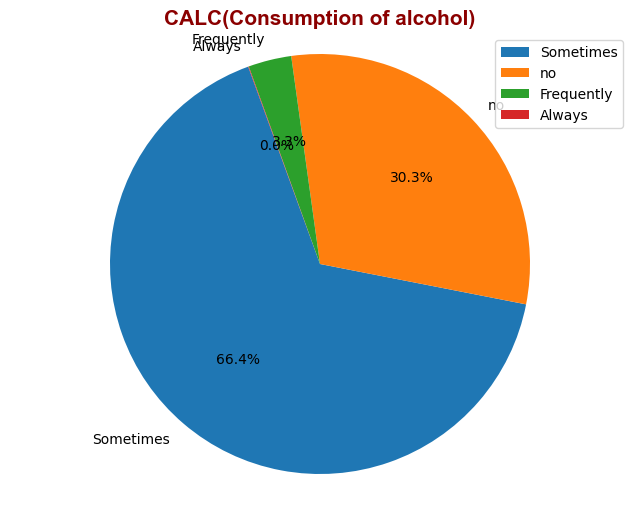

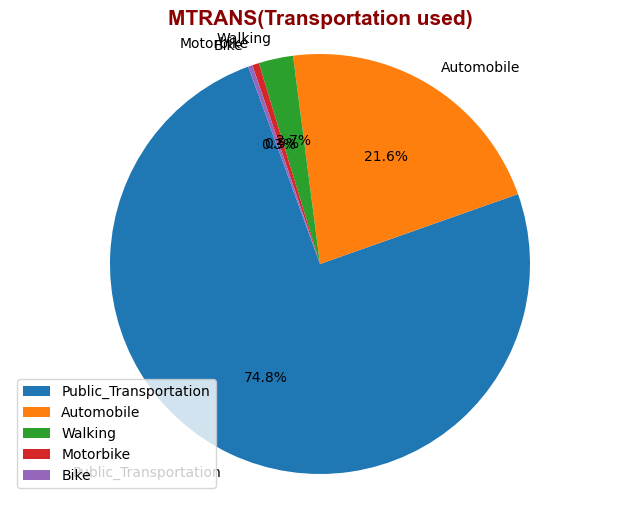

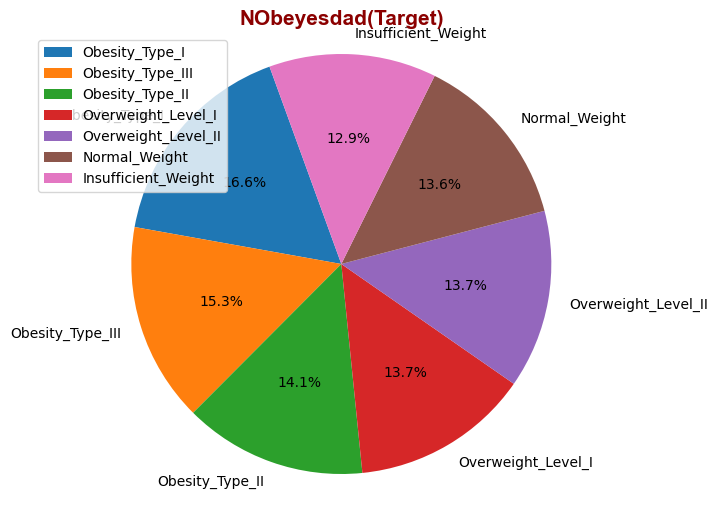

In [17]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)  #i referrs to the first variable of the zip: "categoric_var"
    total_observation_values = list(df[i].value_counts())
    

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

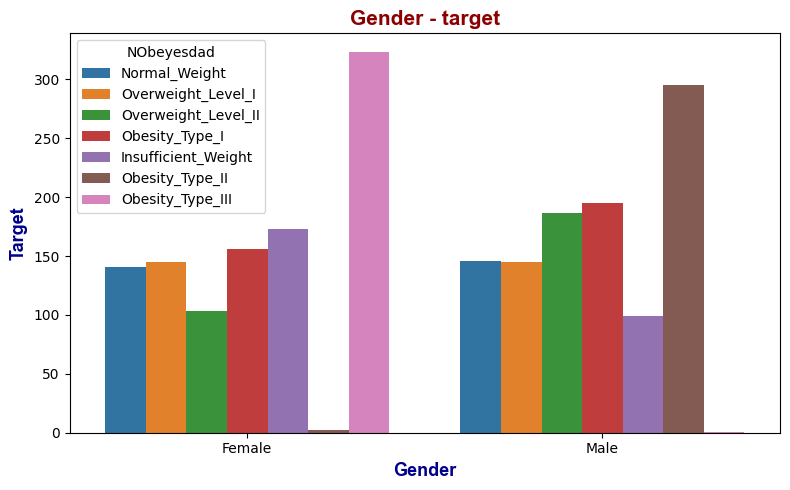

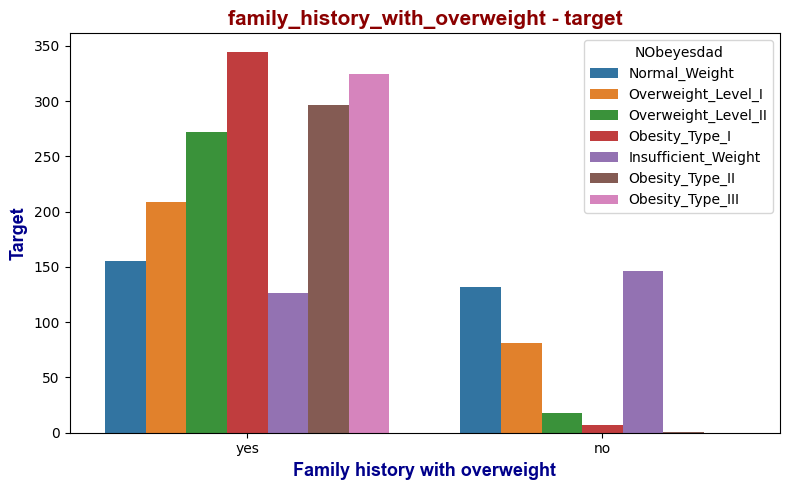

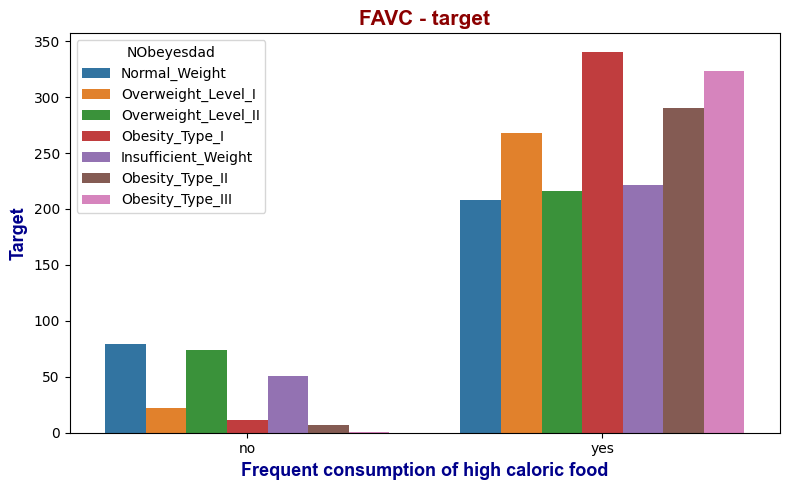

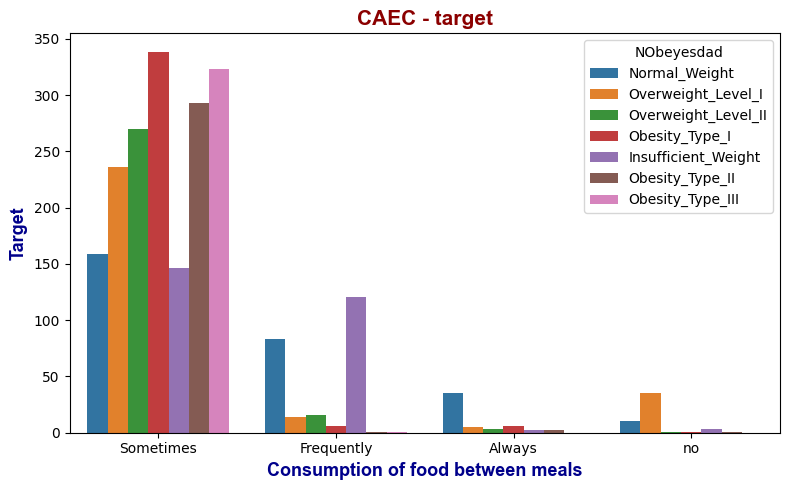

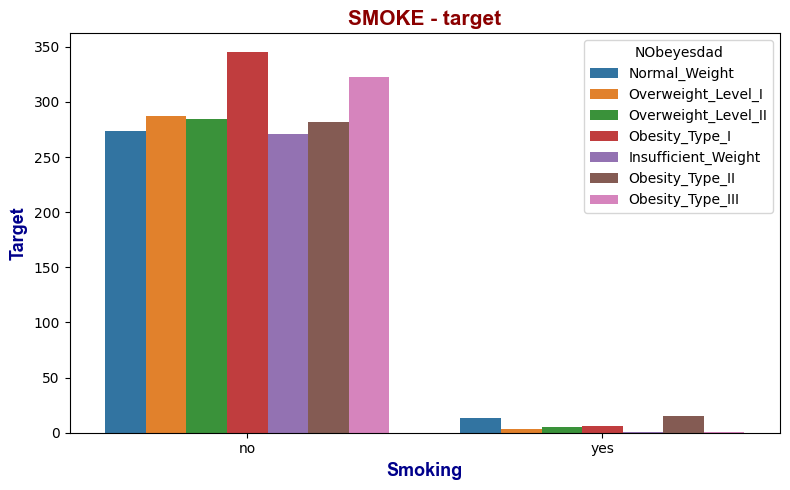

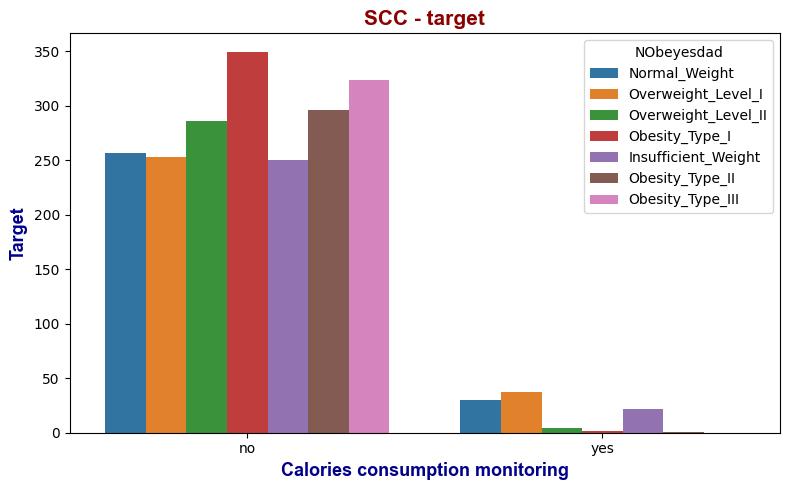

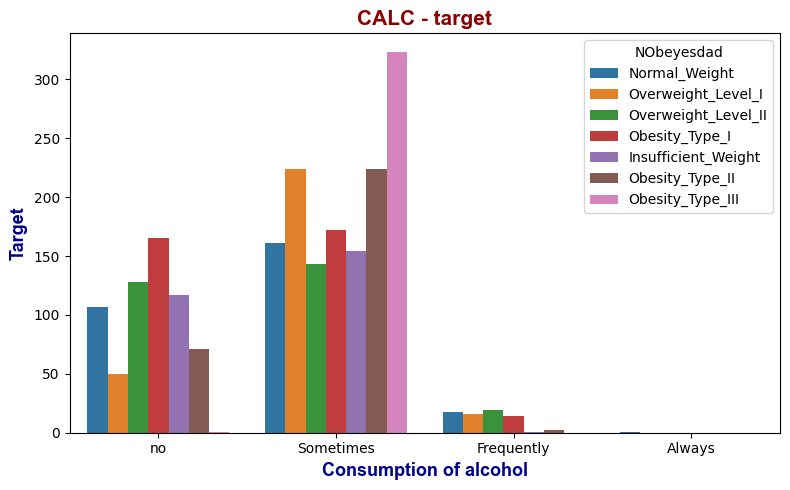

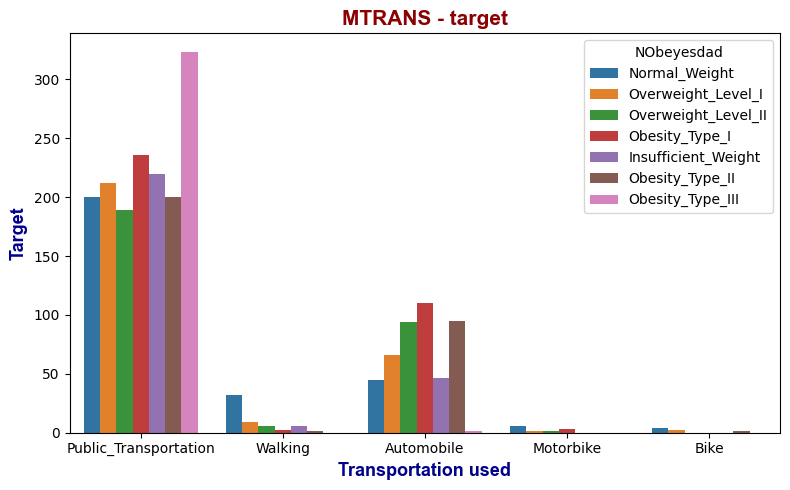

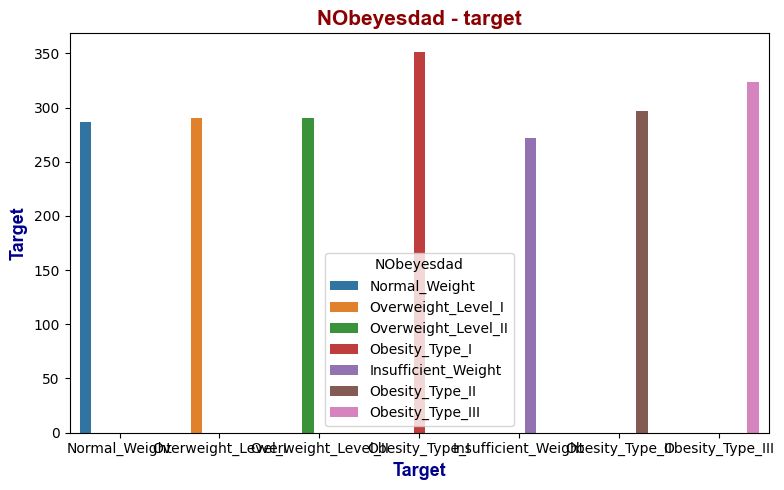

In [18]:
#We will do the analysis with the countplot

title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=i, data=df, hue="NObeyesdad")
    
    plt.title(i + " - target", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Target", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

##### Encoding

Let's now encode the categorical variables so that they are numerical, not strings. We will use label encoder for binary variables and one hot encoder for variables that have more than 2 options. 

In [19]:
df_copy = df.copy()

In [20]:
le = LabelEncoder()

# Apply Label Encoding for each categorical column
for col in categoric_var:
    df_copy[col] = le.fit_transform(df_copy[col])

In [21]:
df_copy.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [22]:
df_copy.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [23]:
numeric_var = df_copy[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF","TUE"]]
categoric_var = df_copy[["Gender","family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]]

In [24]:
categoric_var

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0,1,0,2,0,0,3,3,1
1,0,1,0,2,1,1,2,3,1
2,1,1,0,2,0,0,1,3,1
3,1,0,0,2,0,0,1,4,5
4,1,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...
2106,0,1,1,2,0,0,2,3,4
2107,0,1,1,2,0,0,2,3,4
2108,0,1,1,2,0,0,2,3,4
2109,0,1,1,2,0,0,2,3,4


In [25]:
df_copy.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


##### Correlation

In [26]:
df_copy.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537,0.024908
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,-0.044487,-0.601945,0.236170
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.038986
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.004610,0.387643
family_history_with_overweight,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.313667
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.044582
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.018522
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858,-0.092616
CAEC,0.091543,0.083739,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.327295
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702,-0.023256


<Axes: >

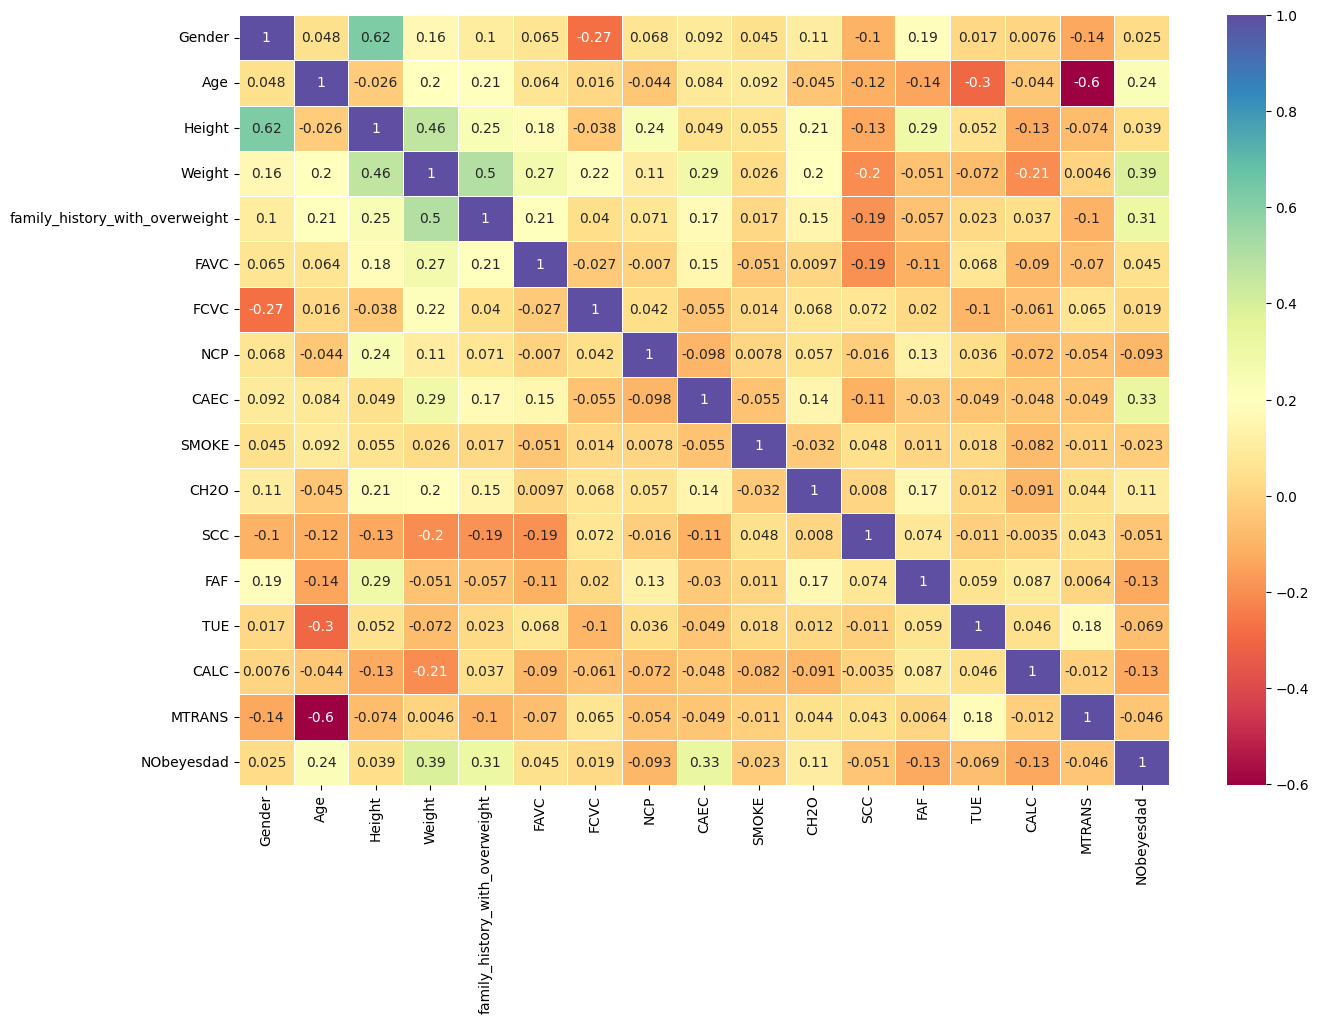

In [27]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_copy.corr(), cmap = "Spectral", annot = True, linewidths = 0.5) #annot = True prints the corr coeff

### MACHINE LEARNING MODELLING

In [29]:
X = df_copy.drop(['NObeyesdad'],axis =1)
Y = df_copy['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=13)

In [30]:
RForest = RandomForestClassifier(n_estimators = 100)
RForest.fit(X_train, y_train)
y_pred = RForest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 95.26813880126183


In [31]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 96.84542586750788


In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 80.4416403785489


In [33]:
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 60.56782334384858


Accuracy for Logistic Regression: 0.80
Accuracy for Random Forest: 0.96
Accuracy for Support Vector Machine: 0.61
Accuracy for XGBoost: 0.97


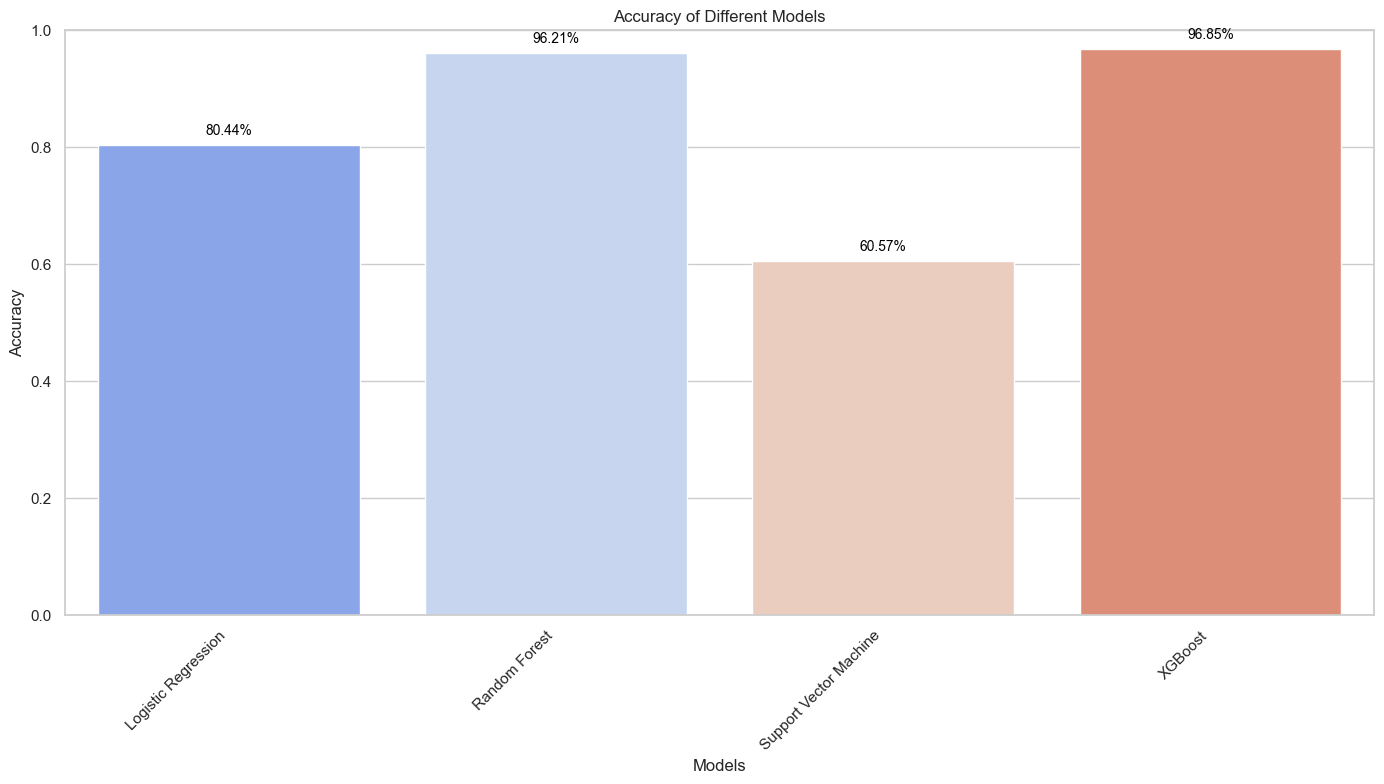

In [34]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=list(models.keys()), y=accuracies, palette="coolwarm")
barplot.set(xlabel='Models', ylabel='Accuracy', title='Accuracy of Different Models')

for p, acc in zip(barplot.patches, accuracies):
    barplot.annotate(f'{acc:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

barplot.yaxis.grid(True)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.ylim([0, 1])
plt.show()

In [35]:
# LET'S PERFORM THE CROSS-VALIDATION

from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(RForest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8548387096774194


In [37]:
scores = cross_val_score(xgb, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8865927419354838


In [38]:
scores = cross_val_score(lr, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7096774193548387


In [40]:
scores = cross_val_score(svc, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.4545362903225807


### CONCLUSION

We have seen that for our dataset, the XGBoost algorithm is the one that performs better, with an accuracy of nearly 97% and a cross-validation score of nearly 89%. The test-accuracy is bigger than the cross-validation score, which indicates that the model generalizes well to new, unseen data.